In [1]:
# INF2178: Assignment 1
# Danika Mariam (1004014880)

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

Mounted at /drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    1854

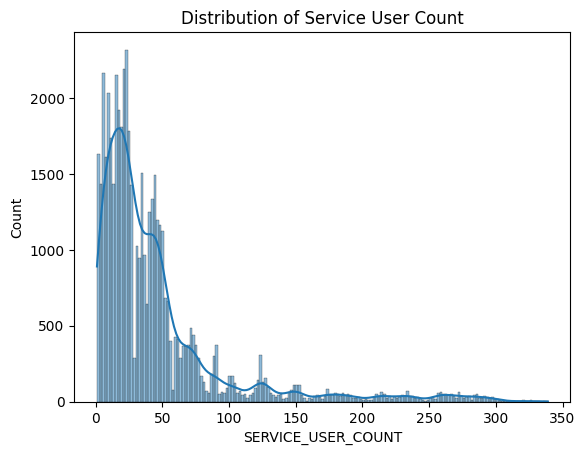

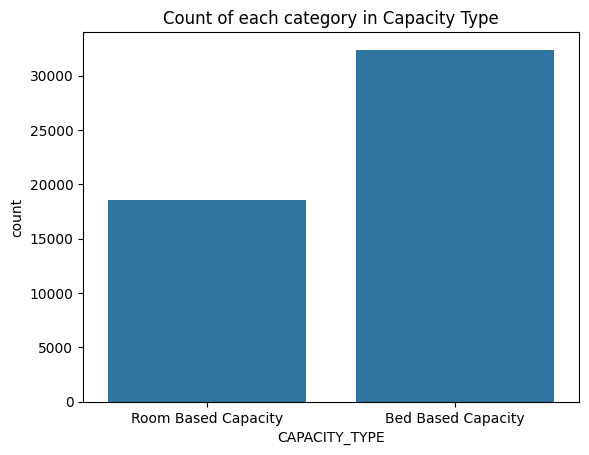

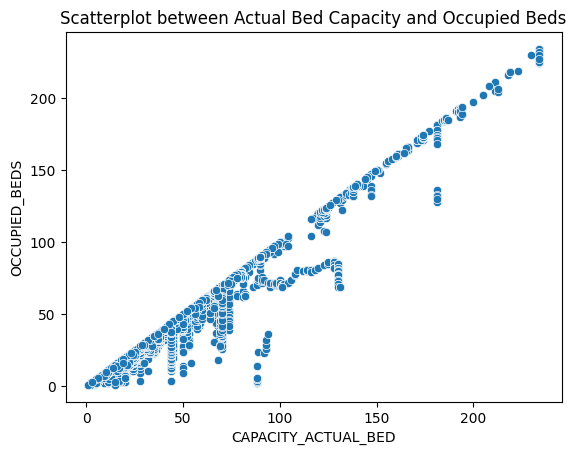

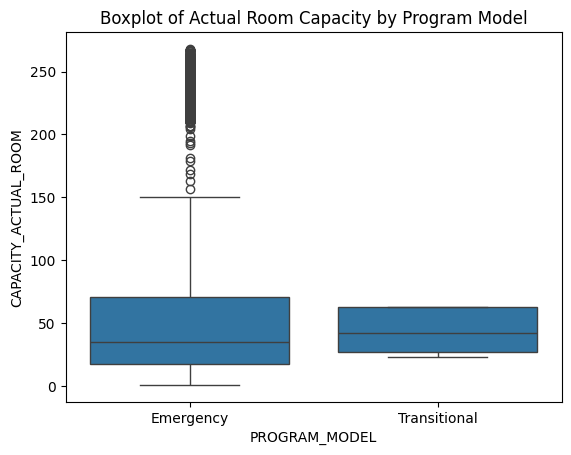

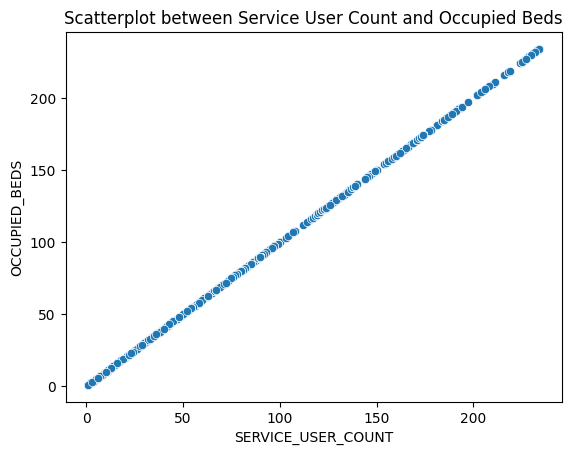

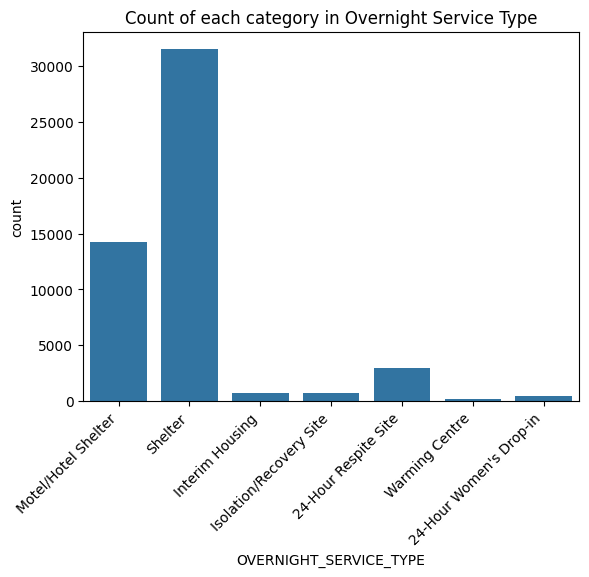

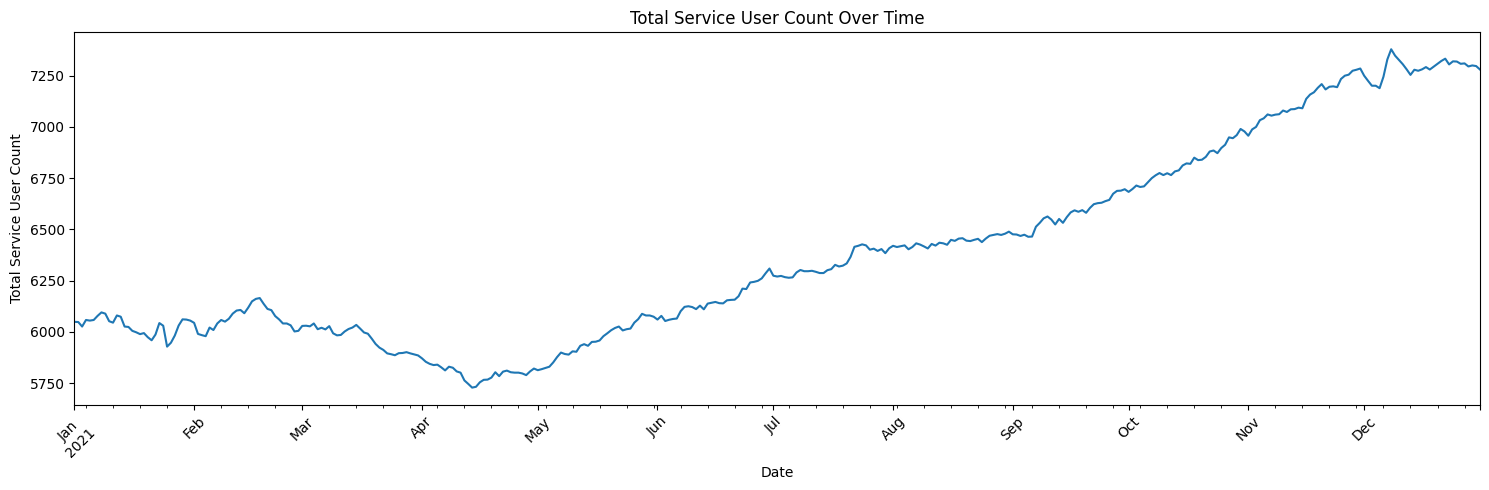

In [3]:
# EXPLORATORY DATA ANALYSIS

# load data
from google.colab import drive, files
drive.mount("/drive", force_remount=True)
df = pd.read_excel('/drive/MyDrive/INF2178_A1_data.xlsx')

# basic info about dataset
print(df.info())

# descriptive stats
print(df.describe())

# distribution of service user count
sns.histplot(df['SERVICE_USER_COUNT'], kde=True)
plt.title('Distribution of Service User Count')
plt.show()

# count of capacity type
sns.countplot(x='CAPACITY_TYPE', data=df)
plt.title('Count of each category in Capacity Type')
plt.show()

# scatterplot (actual bed capacity vs. occupied beds)
sns.scatterplot(x='CAPACITY_ACTUAL_BED', y='OCCUPIED_BEDS', data=df)
plt.title('Scatterplot between Actual Bed Capacity and Occupied Beds')
plt.show()

# boxplot (actual room capacity by program model)
sns.boxplot(x='PROGRAM_MODEL', y='CAPACITY_ACTUAL_ROOM', data=df)
plt.title('Boxplot of Actual Room Capacity by Program Model')
plt.show()

# scatterplot (service user count vs. occupied beds)
sns.scatterplot(x='SERVICE_USER_COUNT', y='OCCUPIED_BEDS', data=df)
plt.title('Scatterplot between Service User Count and Occupied Beds')
plt.show()

# distribution of overnight service type
sns.countplot(x='OVERNIGHT_SERVICE_TYPE', data=df)
plt.title('Count of each category in Overnight Service Type')
plt.xticks(rotation=45, ha='right')
plt.show()

# service user count over time
plt.figure(figsize=(15, 5))
df.groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].sum().plot()
plt.title('Total Service User Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Service User Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
# QUANTITATIVE ANALYSIS USING T-TESTS

# load data
from google.colab import drive, files
drive.mount("/drive", force_remount=True)
df = pd.read_excel('/drive/MyDrive/INF2178_A1_data.xlsx')

# calculate occupancy rate
df['Occupancy_Rate'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']

# remove NaN
df = df.dropna(subset=['Occupancy_Rate', 'PROGRAM_MODEL', 'SECTOR'])

# t-test based on shelter sectors
sectors = df['SECTOR'].unique()

for sector in sectors:
    sector_data = df[df['SECTOR'] == sector]

    # two samples for t-test
    emergency_programs = sector_data[sector_data['PROGRAM_MODEL'] == 'Emergency']['Occupancy_Rate']
    transitional_programs = sector_data[sector_data['PROGRAM_MODEL'] == 'Transitional']['Occupancy_Rate']

    # check for valid and non-empty data
    if not (emergency_programs.empty or transitional_programs.empty):
        # t-test
        t_stat, p_value = ttest_ind(emergency_programs, transitional_programs, equal_var=False)

        # results
        print(f"T-test results for sector '{sector}':")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("")

# t-test based on shelter types
shelter_types = df['OVERNIGHT_SERVICE_TYPE'].unique()

for shelter_type in shelter_types:
    type_data = df[df['OVERNIGHT_SERVICE_TYPE'] == shelter_type]['Occupancy_Rate']

    # check if valid and non-empty
    if not type_data.empty:
        # t-test
        t_stat, p_value = ttest_ind(type_data, df['Occupancy_Rate'], equal_var=False)

        # results
        print(f"T-test results for shelter type '{shelter_type}':")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("")

Mounted at /drive
T-test results for sector 'Mixed Adult':
T-statistic: 20.564639178843063
P-value: 1.243593638236427e-88

T-test results for sector 'Men':
T-statistic: 23.353909287933902
P-value: 3.585351837143295e-112

T-test results for sector 'Women':
T-statistic: 20.72421986470252
P-value: 1.763254618929908e-88

T-test results for sector 'Youth':
T-statistic: 11.57258717730494
P-value: 1.5703981144903252e-30

T-test results for shelter type 'Shelter':
T-statistic: -0.5030195759317381
P-value: 0.6149523456279704

T-test results for shelter type '24-Hour Respite Site':
T-statistic: 42.343914020130256
P-value: 0.0

T-test results for shelter type 'Warming Centre':
T-statistic: -4.4298218221966446
P-value: 1.6040999628779267e-05

T-test results for shelter type '24-Hour Women's Drop-in':
T-statistic: -16.862019629511774
P-value: 3.318499479430612e-51

T-test results for shelter type 'Motel/Hotel Shelter':
T-statistic: -17.402674323545728
P-value: 4.4788916340241316e-40

